## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_shape=10, nero_nums=[256,128,64,32], drop_ration = 0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, unit in enumerate(nero_nums):
        if i==0:
            x = keras.layers.Dense(units=unit, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = keras.layers.Dropout(drop_ration)(x)
        else:
            x = keras.layers.Dense(units=unit, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = keras.layers.Dropout(drop_ration)(x)
    out = keras.layers.Dense(units=output_shape, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

def show_history(history):
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(history.keys()):
        plt.plot(range(len(history[cond]['train_loss'])), history[cond]['train_loss'], '-', label=cond)
        plt.plot(range(len(history[cond]['val_loss'])), history[cond]['val_loss'], '--', label=cond)
    
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(history.keys()):
        plt.plot(range(len(history[cond]['train_acc'])), history[cond]['train_acc'], '-', label=cond)
        plt.plot(range(len(history[cond]['val_acc'])), history[cond]['val_acc'], '-', label=cond)
    
    plt.title("Accuracy")
    plt.legend()
    plt.show()


In [7]:
results = {}

In [8]:
"""Code Here
設定超參數
"""
lr = 0.01
epochs = 30
batch_size = 256
momentum = 0.5

In [9]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(x_train.shape[1:], nero_nums=[256,128], drop_ration = 0.2)
optimizer = keras.optimizers.SGD(lr, momentum=momentum)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

W0720 00:36:12.737362  1692 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 00:36:12.757361  1692 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 00:36:12.759360  1692 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 00:36:12.774363  1692 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0720 00:36:12.784363  1692 deprecation.py:506

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 87us/step - loss: 2.0893 - acc: 0.2406 - val_loss: 1.9101 - val_acc: 0.3325
Epoch 2/30
50000/50000 [==============================] - 4s 83us/step - loss: 1.9167 - acc: 0.3144 - val_loss: 1.8246 - val_acc: 0.3569
Epoch 3/30
50000/50000 [==============================] - 4s 79us/step - loss: 1.8472 - acc: 0.3429 - val_loss: 1.7665 - val_acc: 0.3815
Epoch 4/30
50000/50000 [==============================] - 4s 79us/step - loss: 1.8024 - acc: 0.3575 - val_loss: 1.7263 - val_acc: 0.3947
Epoch 5/30
50000/50000 [==============================] - 4s 78us/step - loss: 1.7630 - acc: 0.3725 - val_loss: 1.6899 - val_acc: 0.4078
Epoch 6/30
50000/50000 [==============================] - 4s 78us/step - loss: 1.7344 - acc: 0.3848 - val_loss: 1.6505 - val_acc: 0.4239
Epoch 7/30
50000/50000 [==============================] - 4s 80us/step - loss: 1.7064 - acc: 0.3950 - val_loss: 1.6310 - val_acc

In [10]:
results['SGD_2_0.2'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

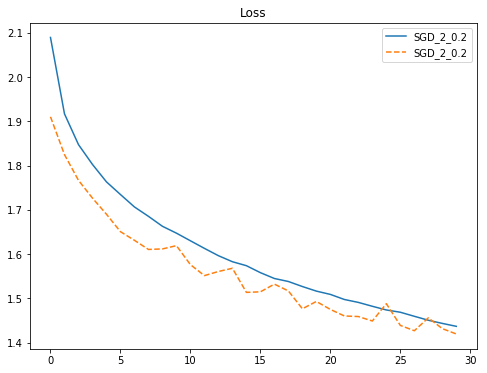

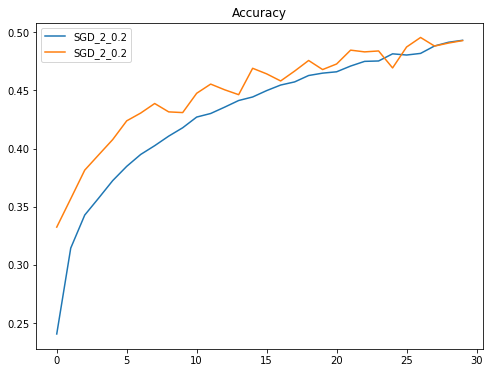

In [11]:
show_history(results)

In [12]:
model = build_mlp(x_train.shape[1:], nero_nums=[256,128], drop_ration = 0.5)
optimizer = keras.optimizers.SGD(lr, momentum=momentum)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 84us/step - loss: 2.2185 - acc: 0.1723 - val_loss: 2.0573 - val_acc: 0.2814
Epoch 2/30
50000/50000 [==============================] - 4s 79us/step - loss: 2.0841 - acc: 0.2307 - val_loss: 1.9552 - val_acc: 0.3147
Epoch 3/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.0163 - acc: 0.2627 - val_loss: 1.8998 - val_acc: 0.3425
Epoch 4/30
50000/50000 [==============================] - 4s 79us/step - loss: 1.9730 - acc: 0.2834 - val_loss: 1.8560 - val_acc: 0.3471
Epoch 5/30
50000/50000 [==============================] - 4s 83us/step - loss: 1.9432 - acc: 0.2939 - val_loss: 1.8248 - val_acc: 0.3693
Epoch 6/30
50000/50000 [==============================] - 4s 87us/step - loss: 1.9102 - acc: 0.3092 - val_loss: 1.7845 - val_acc: 0.3762
Epoch 7/30
50000/50000 [==============================] - 4s 87us/step - loss: 1.8941 - acc: 0.3166 - val_loss: 1.7710 - val_acc

In [13]:
results['SGD_2_0.5'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

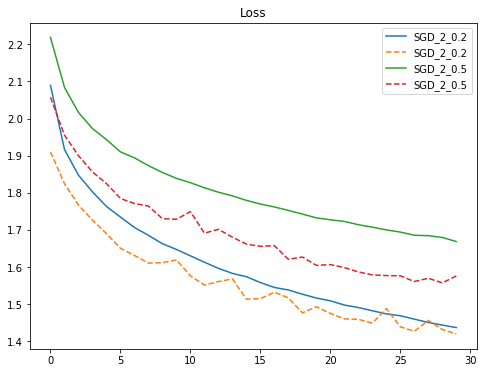

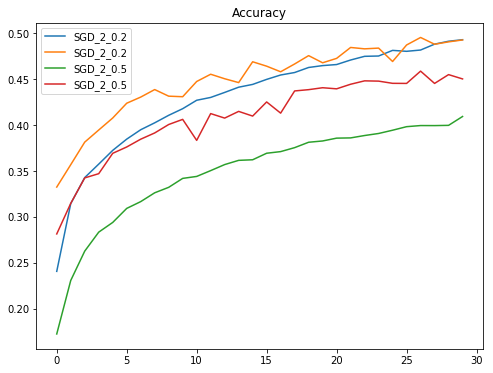

In [14]:
show_history(results)

In [15]:
model = build_mlp(x_train.shape[1:], drop_ration = 0.2)
optimizer = keras.optimizers.SGD(lr, momentum=momentum)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 94us/step - loss: 2.2408 - acc: 0.1500 - val_loss: 2.1278 - val_acc: 0.2190
Epoch 2/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.1012 - acc: 0.2155 - val_loss: 1.9710 - val_acc: 0.3061
Epoch 3/30
50000/50000 [==============================] - 4s 88us/step - loss: 2.0134 - acc: 0.2537 - val_loss: 1.8971 - val_acc: 0.3336
Epoch 4/30
50000/50000 [==============================] - 4s 86us/step - loss: 1.9652 - acc: 0.2740 - val_loss: 1.8452 - val_acc: 0.3456
Epoch 5/30
50000/50000 [==============================] - 4s 89us/step - loss: 1.9284 - acc: 0.2920 - val_loss: 1.8229 - val_acc: 0.3601
Epoch 6/30
50000/50000 [==============================] - 4s 87us/step - loss: 1.8975 - acc: 0.3051 - val_loss: 1.7788 - val_acc: 0.3684
Epoch 7/30
50000/50000 [==============================] - 4s 86us/step - loss: 1.8738 - acc: 0.3140 - val_loss: 1.7577 - val_acc

In [16]:
results['SGD_4_0.2'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

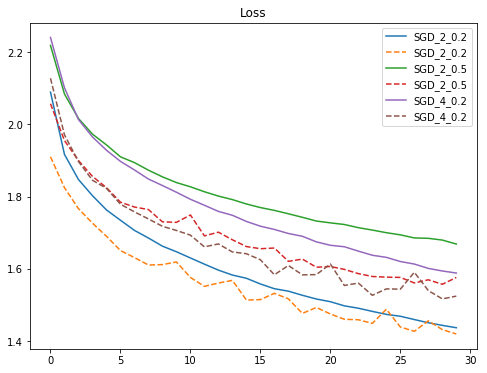

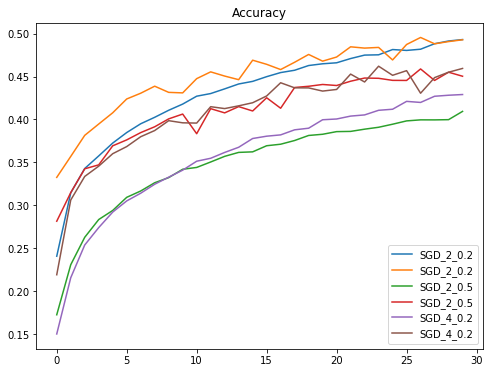

In [17]:
show_history(results)

In [18]:
model = build_mlp(x_train.shape[1:], drop_ration = 0.5)
optimizer = keras.optimizers.SGD(lr, momentum=momentum)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.3131 - acc: 0.1122 - val_loss: 2.2782 - val_acc: 0.1802
Epoch 2/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.2784 - acc: 0.1281 - val_loss: 2.2400 - val_acc: 0.1750
Epoch 3/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.2464 - acc: 0.1440 - val_loss: 2.1899 - val_acc: 0.1744
Epoch 4/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.2175 - acc: 0.1510 - val_loss: 2.1632 - val_acc: 0.1788
Epoch 5/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.1934 - acc: 0.1548 - val_loss: 2.1284 - val_acc: 0.1858
Epoch 6/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.1717 - acc: 0.1604 - val_loss: 2.0982 - val_acc: 0.1822
Epoch 7/30
50000/50000 [==============================] - 4s 85us/step - loss: 2.1514 - acc: 0.1635 - val_loss: 2.0798 - val_acc

In [19]:
results['SGD_4_0.5'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

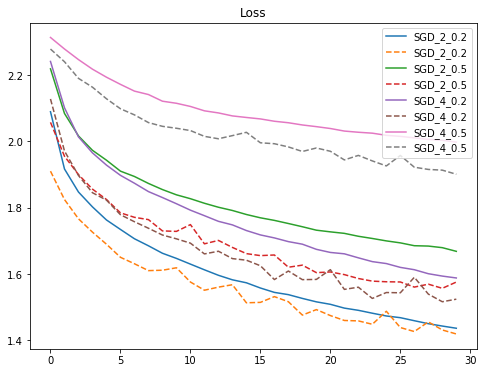

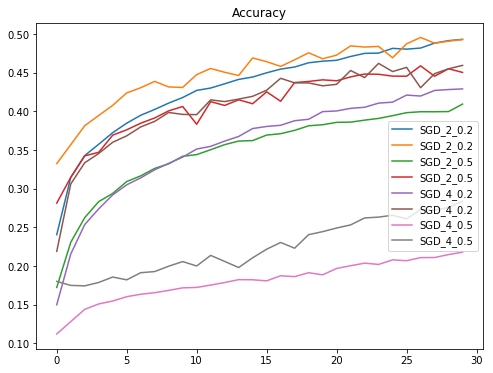

In [20]:
show_history(results)

In [21]:
adam_results ={}

In [22]:
model = build_mlp(x_train.shape[1:], nero_nums=[256,128], drop_ration = 0.2)
optimizer = keras.optimizers.Adam(lr)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 113us/step - loss: 14.4162 - acc: 0.1005 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_lo

In [23]:
results['Adam_2_0.2'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}
adam_results['Adam_2_0.2'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

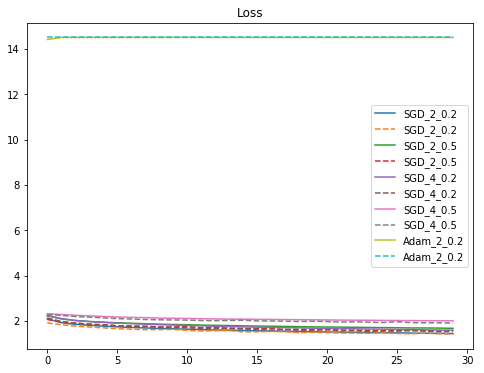

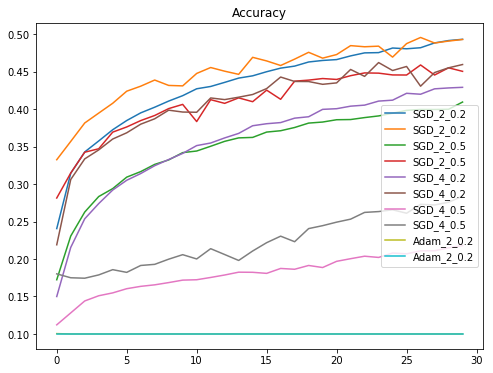

In [24]:
show_history(results)

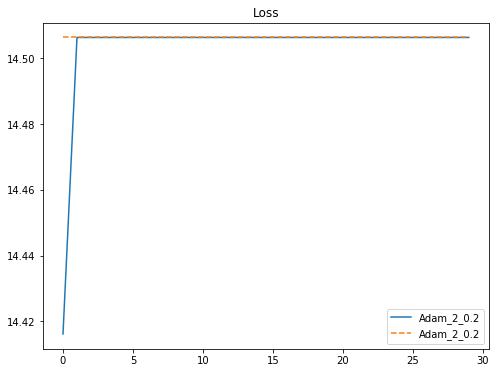

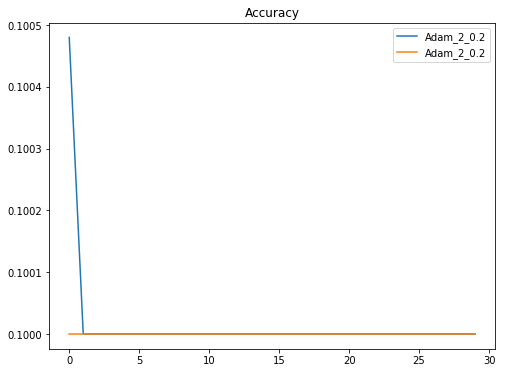

In [25]:
show_history(adam_results)

In [26]:
model = build_mlp(x_train.shape[1:], nero_nums=[256,128], drop_ration = 0.5)
optimizer = keras.optimizers.Adam(lr)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 111us/step - loss: 2.4026 - acc: 0.1546 - val_loss: 2.0602 - val_acc: 0.2291
Epoch 2/30
50000/50000 [==============================] - 5s 101us/step - loss: 2.1763 - acc: 0.1565 - val_loss: 2.1551 - val_acc: 0.1927
Epoch 3/30
50000/50000 [==============================] - 5s 101us/step - loss: 2.2181 - acc: 0.1365 - val_loss: 2.1536 - val_acc: 0.1729
Epoch 4/30
50000/50000 [==============================] - 5s 103us/step - loss: 2.1846 - acc: 0.1475 - val_loss: 2.0880 - val_acc: 0.1858
Epoch 5/30
50000/50000 [==============================] - 5s 102us/step - loss: 2.1938 - acc: 0.1445 - val_loss: 2.1144 - val_acc: 0.1676
Epoch 6/30
50000/50000 [==============================] - 5s 103us/step - loss: 2.1798 - acc: 0.1503 - val_loss: 2.1434 - val_acc: 0.1642
Epoch 7/30
50000/50000 [==============================] - 5s 103us/step - loss: 2.1967 - acc: 0.1409 - val_loss: 2.1166 - 

In [27]:
results['Adam_2_0.5'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}
adam_results['Adam_2_0.5'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

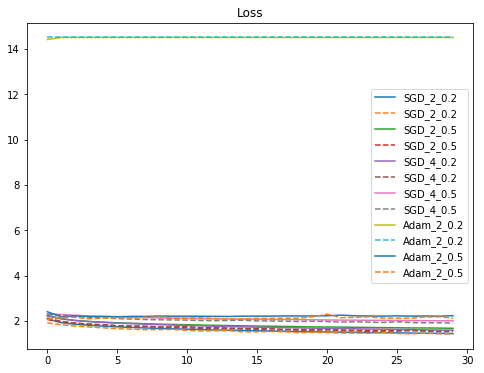

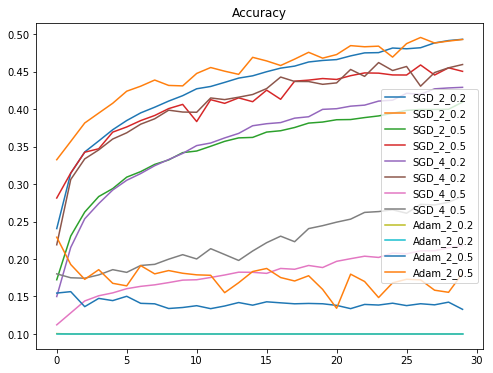

In [28]:
show_history(results)

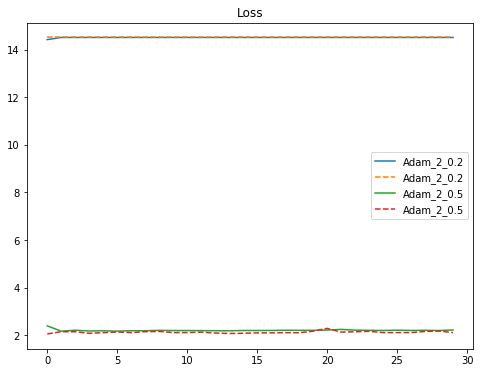

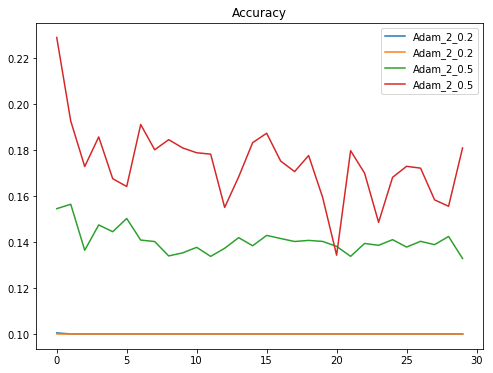

In [29]:
show_history(adam_results)

In [30]:
model = build_mlp(x_train.shape[1:], drop_ration = 0.2)
optimizer = keras.optimizers.Adam(lr)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 126us/step - loss: 2.3699 - acc: 0.0984 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 6s 114us/step - loss: 2.3032 - acc: 0.0990 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 6s 111us/step - loss: 2.2839 - acc: 0.1152 - val_loss: 2.1952 - val_acc: 0.1572
Epoch 4/30
50000/50000 [==============================] - 5s 109us/step - loss: 2.1703 - acc: 0.1592 - val_loss: 2.1163 - val_acc: 0.1728
Epoch 5/30
50000/50000 [==============================] - 5s 109us/step - loss: 2.1413 - acc: 0.1633 - val_loss: 2.0714 - val_acc: 0.1816
Epoch 6/30
50000/50000 [==============================] - 6s 115us/step - loss: 2.1281 - acc: 0.1690 - val_loss: 2.0729 - val_acc: 0.1781
Epoch 7/30
50000/50000 [==============================] - 6s 111us/step - loss: 2.1192 - acc: 0.1683 - val_loss: 2.0878 - 

In [31]:
results['Adam_4_0.2'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}
adam_results['Adam_4_0.2'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

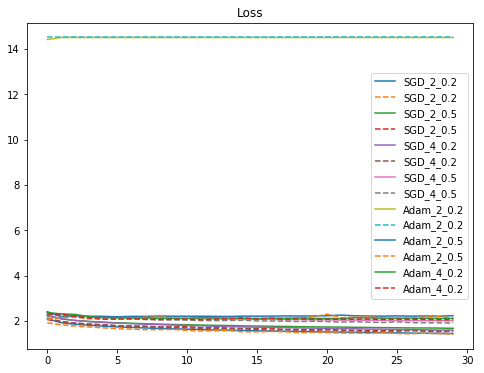

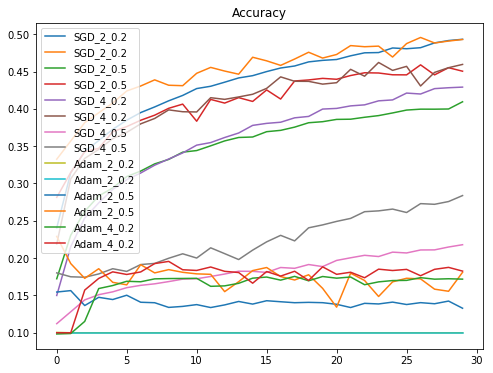

In [32]:
show_history(results)

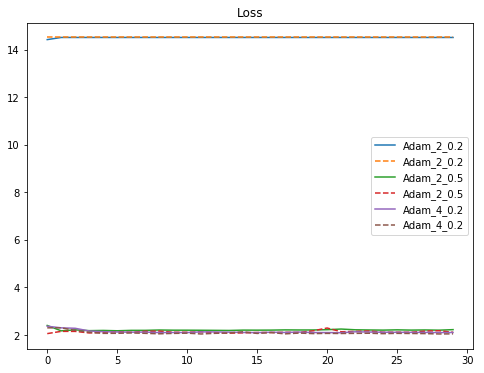

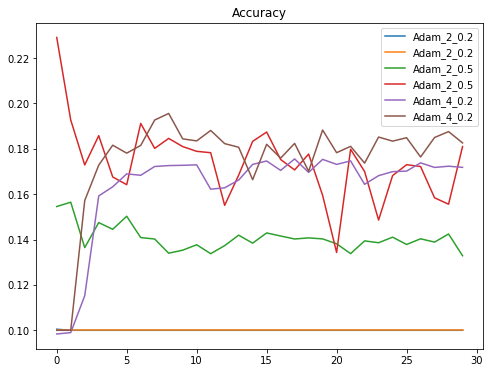

In [33]:
show_history(adam_results)

In [34]:
model = build_mlp(x_train.shape[1:], drop_ration = 0.5)
optimizer = keras.optimizers.Adam(lr)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 126us/step - loss: 2.4954 - acc: 0.1015 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 6s 111us/step - loss: 2.2852 - acc: 0.1104 - val_loss: 2.2258 - val_acc: 0.1478
Epoch 3/30
50000/50000 [==============================] - 6s 113us/step - loss: 2.2676 - acc: 0.1221 - val_loss: 2.1947 - val_acc: 0.1455
Epoch 4/30
50000/50000 [==============================] - 6s 112us/step - loss: 2.2573 - acc: 0.1275 - val_loss: 2.2429 - val_acc: 0.1562
Epoch 5/30
50000/50000 [==============================] - 6s 113us/step - loss: 2.2575 - acc: 0.1259 - val_loss: 2.1961 - val_acc: 0.1641
Epoch 6/30
50000/50000 [==============================] - 5s 110us/step - loss: 2.2606 - acc: 0.1242 - val_loss: 2.1833 - val_acc: 0.1665
Epoch 7/30
50000/50000 [==============================] - 6s 113us/step - loss: 2.2574 - acc: 0.1269 - val_loss: 2.2411 - 

In [35]:
results['Adam_4_0.5'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}
adam_results['Adam_4_0.5'] = {
    'train_loss':model.history.history['loss'],
    'val_loss':model.history.history['val_loss'],
    'train_acc':model.history.history['acc'],
    'val_acc':model.history.history['val_acc']
}

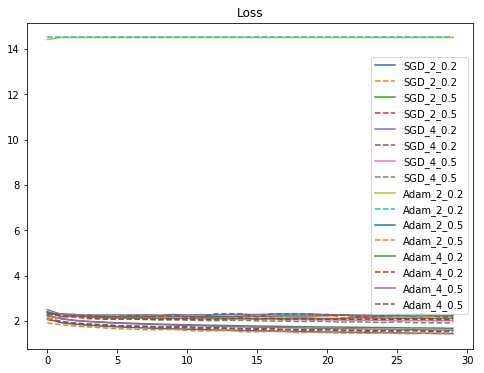

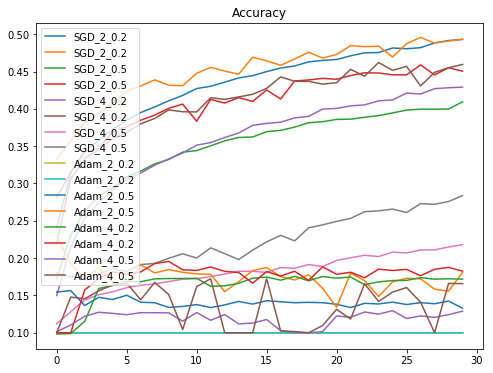

In [36]:
show_history(results)

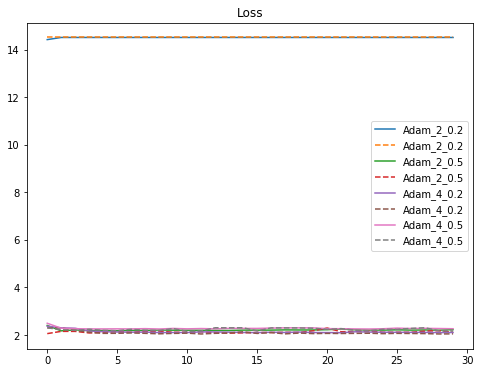

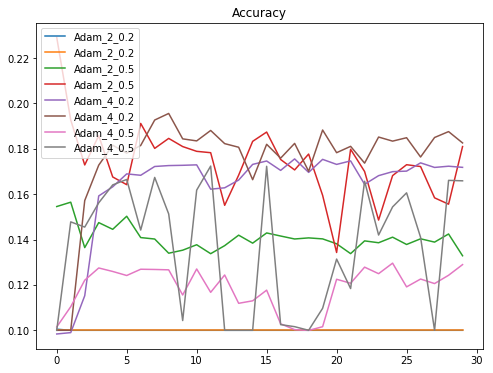

In [37]:
show_history(adam_results)